In [1]:
###importaciones
###aquí se hacen las importaciones necesarias para entrenar y crear los modelos, cada uno cumple una función.
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import category_encoders
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import joblib
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import graphviz
import xgboost as xgb

# graficos incrustados
%matplotlib inline

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [2]:
##lectura del csv y objetos a usar
##Aquí se carga el archivo con los datos por medio de la librería Pandas, usando el comando read_csv, el cual es la extensión del archivo y a su vez se le agrega a una variable llamada data.
data=pd.read_csv('Historial_Cincalum_7.csv')
##Aquí de asignan los objetos como label encoder y el árbol de decisiones a una variable con un nombre más corto, con el fin de hacer la programación más amena. 
le=LabelEncoder()
dt=DecisionTreeClassifier()
##Aquí sólo se llama a la variable data y al eecutarlo se mostrará su contenido. 
data

,Estatus,FECHA_ALTA,IdMaterial,NECESIDAD_ORIGEN,NECESIDAD_DESTINO,PRO_ORIGEN,PRO_DESTINO,CCLASEPRODTOOrigen,ACEROOrigen,ACABSUPERFRECOrigen,...,NORTOLESPESORDestino,PLANITUDDestino,RECUBRIMIENTODestino,SELLODestino,SUPERFICIEDestino,TAMFLORDestino,TRATSUPERFDestino,USOGRALDestino,Reasignacion,Pedido
0,Rechazado,16-10-2017 15:58:27,3A689963JG303,2000692047,2000696207,MP517148,MP517137,M-P-CINCALUM-BOB-_,C071TM,MATE,...,TERNIUM CALIBRE,NIVEL 3 / 29 UI / 4MM,AZ50,NO,INTERNA,REGULAR,PASIVADO,COMERCIAL Y CONSTRUCCION,OK,1
1,Rechazado,16-10-2017 15:59:28,3A689961JG303,2000692047,2000696207,MP517148,MP517137,M-P-CINCALUM-BOB-_,C071TM,MATE,...,TERNIUM CALIBRE,NIVEL 3 / 29 UI / 4MM,AZ50,NO,INTERNA,REGULAR,PASIVADO,COMERCIAL Y CONSTRUCCION,OK,1
2,Rechazado,16-10-2017 15:59:48,3A689961JG301,2000692047,2000696207,MP517148,MP517137,M-P-CINCALUM-BOB-_,C071TM,MATE,...,TERNIUM CALIBRE,NIVEL 3 / 29 UI / 4MM,AZ50,NO,INTERNA,REGULAR,PASIVADO,COMERCIAL Y CONSTRUCCION,OK,1
3,Rechazado,16-10-2017 16:00:00,3A689961JG300,2000692047,2000696207,MP517148,MP517137,M-P-CINCALUM-BOB-_,C071TM,MATE,...,TERNIUM CALIBRE,NIVEL 3 / 29 UI / 4MM,AZ50,NO,INTERNA,REGULAR,PASIVADO,COMERCIAL Y CONSTRUCCION,OK,1
4,Rechazado,16-10-2017 15:58:17,3A689963JG304,2000692047,2000696207,MP517148,MP517137,M-P-CINCALUM-BOB-_,C071TM,MATE,...,TERNIUM CALIBRE,NIVEL 3 / 29 UI / 4MM,AZ50,NO,INTERNA,REGULAR,PASIVADO,COMERCIAL Y CONSTRUCCION,OK,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,OK,19-10-2017 18:27:35,3A581208JG302,3001442447,1000968206,MP523221,MP523221,M-P-CINCALUM-BOB-_,C121TM,MATE,...,1/2 ASTM A 924,NIVEL 3 / 29 UI / 4MM,AZ55,NO,SEMI-EXPUESTA,REGULAR,PASIVADO ACRILICO ROOFING,COMERCIAL Y CONSTRUCCION,OK,1
4439,OK,19-10-2017 18:25:28,3A581208JG304,3001442447,1000942158,MP523221,MP523221,M-P-CINCALUM-BOB-_,C121TM,MATE,...,1/2 ASTM A 924,NIVEL 3 / 29 UI / 4MM,AZ55,NO,SEMI-EXPUESTA,REGULAR,PASIVADO ACRILICO ROOFING,COMERCIAL Y CONSTRUCCION,OK,1
4440,OK,19-10-2017 18:27:34,3A581208JG302,3001442447,1000968206,MP523221,MP523221,M-P-CINCALUM-BOB-_,C121TM,MATE,...,1/2 ASTM A 924,NIVEL 3 / 29 UI / 4MM,AZ55,NO,SEMI-EXPUESTA,REGULAR,PASIVADO ACRILICO ROOFING,COMERCIAL Y CONSTRUCCION,OK,1
4441,OK,28-09-2017 03:29:52,3A615828JC300,1000848902,1000950333,MP523221,MP523221,M-P-CINCALUM-BOB-_,C121TM,MATE,...,1/2 ASTM A 924,NIVEL 3 / 29 UI / 4MM,AZ55,NO,SEMI-EXPUESTA,REGULAR,PASIVADO ACRILICO ROOFING,COMERCIAL Y CONSTRUCCION,OK,1


In [3]:
###limpieza de datos
##Se crea una variable "de" la cual será llamada cuando se use el comando drop
##ésta variable contiene las columnas que no se utilizarán en el analítico. 
de=['Estatus', 'FECHA_ALTA', 'IdMaterial', 'NECESIDAD_ORIGEN','NECESIDAD_DESTINO', 'PRO_ORIGEN', 'PRO_DESTINO', 'Pedido']
##Se crea una nueva variable para datos, se mete la variable data pero se le aplica el comando drop
##el cual en conjunto con la variable de desecahrá las columnas que contiene la variable. 
datac=data.drop(de,axis=1)
datac

,CCLASEPRODTOOrigen,ACEROOrigen,ACABSUPERFRECOrigen,ACEITADOOrigen,BORDESOrigen,CARAINSPECCIONOrigen,DIAM__INTERNOOrigen,EXTREMOSOrigen,NORMAOrigen,NORRECUBRIMIENOrigen,...,NORTOLANCHODestino,NORTOLESPESORDestino,PLANITUDDestino,RECUBRIMIENTODestino,SELLODestino,SUPERFICIEDestino,TAMFLORDestino,TRATSUPERFDestino,USOGRALDestino,Reasignacion
0,M-P-CINCALUM-BOB-_,C071TM,MATE,NO,LAMINACION,SUPERIOR,508,CORTADOS 98% EN ESPESOR,ASTM A 792 \ SS 33 (V 2008 REV 0),ASTM A 792,...,ASTM A 924,TERNIUM CALIBRE,NIVEL 3 / 29 UI / 4MM,AZ50,NO,INTERNA,REGULAR,PASIVADO,COMERCIAL Y CONSTRUCCION,OK
1,M-P-CINCALUM-BOB-_,C071TM,MATE,NO,LAMINACION,SUPERIOR,508,CORTADOS 98% EN ESPESOR,ASTM A 792 \ SS 33 (V 2008 REV 0),ASTM A 792,...,ASTM A 924,TERNIUM CALIBRE,NIVEL 3 / 29 UI / 4MM,AZ50,NO,INTERNA,REGULAR,PASIVADO,COMERCIAL Y CONSTRUCCION,OK
2,M-P-CINCALUM-BOB-_,C071TM,MATE,NO,LAMINACION,SUPERIOR,508,CORTADOS 98% EN ESPESOR,ASTM A 792 \ SS 33 (V 2008 REV 0),ASTM A 792,...,ASTM A 924,TERNIUM CALIBRE,NIVEL 3 / 29 UI / 4MM,AZ50,NO,INTERNA,REGULAR,PASIVADO,COMERCIAL Y CONSTRUCCION,OK
3,M-P-CINCALUM-BOB-_,C071TM,MATE,NO,LAMINACION,SUPERIOR,508,CORTADOS 98% EN ESPESOR,ASTM A 792 \ SS 33 (V 2008 REV 0),ASTM A 792,...,ASTM A 924,TERNIUM CALIBRE,NIVEL 3 / 29 UI / 4MM,AZ50,NO,INTERNA,REGULAR,PASIVADO,COMERCIAL Y CONSTRUCCION,OK
4,M-P-CINCALUM-BOB-_,C071TM,MATE,NO,LAMINACION,SUPERIOR,508,CORTADOS 98% EN ESPESOR,ASTM A 792 \ SS 33 (V 2008 REV 0),ASTM A 792,...,ASTM A 924,TERNIUM CALIBRE,NIVEL 3 / 29 UI / 4MM,AZ50,NO,INTERNA,REGULAR,PASIVADO,COMERCIAL Y CONSTRUCCION,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,M-P-CINCALUM-BOB-_,C121TM,MATE,NO,LAMINACION,SUPERIOR,508,CORTADOS 98% EN ESPESOR,ASTM A 792 \ SS 50 CLASE 2 (V 2008 REV 0),ASTM A 792,...,ASTM A 924,1/2 ASTM A 924,NIVEL 3 / 29 UI / 4MM,AZ55,NO,SEMI-EXPUESTA,REGULAR,PASIVADO ACRILICO ROOFING,COMERCIAL Y CONSTRUCCION,OK
4439,M-P-CINCALUM-BOB-_,C121TM,MATE,NO,LAMINACION,SUPERIOR,508,CORTADOS 98% EN ESPESOR,ASTM A 792 \ SS 50 CLASE 2 (V 2008 REV 0),ASTM A 792,...,ASTM A 924,1/2 ASTM A 924,NIVEL 3 / 29 UI / 4MM,AZ55,NO,SEMI-EXPUESTA,REGULAR,PASIVADO ACRILICO ROOFING,COMERCIAL Y CONSTRUCCION,OK
4440,M-P-CINCALUM-BOB-_,C121TM,MATE,NO,LAMINACION,SUPERIOR,508,CORTADOS 98% EN ESPESOR,ASTM A 792 \ SS 50 CLASE 2 (V 2008 REV 0),ASTM A 792,...,ASTM A 924,1/2 ASTM A 924,NIVEL 3 / 29 UI / 4MM,AZ55,NO,SEMI-EXPUESTA,REGULAR,PASIVADO ACRILICO ROOFING,COMERCIAL Y CONSTRUCCION,OK
4441,M-P-CINCALUM-BOB-_,C121TM,MATE,NO,LAMINACION,SUPERIOR,508,CORTADOS 98% EN ESPESOR,ASTM A 792 \ SS 50 CLASE 2 (V 2008 REV 0),ASTM A 792,...,ASTM A 924,1/2 ASTM A 924,NIVEL 3 / 29 UI / 4MM,AZ55,NO,SEMI-EXPUESTA,REGULAR,PASIVADO ACRILICO ROOFING,COMERCIAL Y CONSTRUCCION,OK


In [4]:
##Aquí se utiliza la función de pandas "dataframe" para convertir el csv a un dataframe de pandas.  
main_df=datac
main_df=pd.DataFrame(data=main_df)
print(main_df.head(10))

   CCLASEPRODTOOrigen ACEROOrigen ACABSUPERFRECOrigen ACEITADOOrigen  \
0  M-P-CINCALUM-BOB-_      C071TM                MATE             NO   
1  M-P-CINCALUM-BOB-_      C071TM                MATE             NO   
2  M-P-CINCALUM-BOB-_      C071TM                MATE             NO   
3  M-P-CINCALUM-BOB-_      C071TM                MATE             NO   
4  M-P-CINCALUM-BOB-_      C071TM                MATE             NO   
5  M-P-CINCALUM-BOB-_      C071TM                MATE             NO   
6  M-P-CINCALUM-BOB-_      C071TM                MATE             NO   
7  M-P-CINCALUM-BOB-_      C071TM                MATE             NO   
8  M-P-CINCALUM-BOB-_      C071TM                MATE             NO   
9  M-P-CINCALUM-BOB-_      C071TM                MATE             NO   

  BORDESOrigen CARAINSPECCIONOrigen  DIAM__INTERNOOrigen  \
0   LAMINACION             SUPERIOR                  508   
1   LAMINACION             SUPERIOR                  508   
2   LAMINACION             

In [6]:
## esto es solo para apoyarnos y sacar los nombres de las columnas.
main_df.columns

Index(['CCLASEPRODTOOrigen', 'ACEROOrigen', 'ACABSUPERFRECOrigen',
       'ACEITADOOrigen', 'BORDESOrigen', 'CARAINSPECCIONOrigen',
       'DIAM__INTERNOOrigen', 'EXTREMOSOrigen', 'NORMAOrigen',
       'NORRECUBRIMIENOrigen', 'NORTOLANCHOOrigen', 'NORTOLESPESOROrigen',
       'PLANITUDOrigen', 'RECUBRIMIENTOOrigen', 'SELLOOrigen',
       'SUPERFICIEOrigen', 'TAMFLOROrigen', 'TRATSUPERFOrigen',
       'USOGRALOrigen', 'CCLASEPRODTODestino', 'ACABSUPERFRECDestino',
       'ACERODestino', 'ACEITADODestino', 'BORDESDestino',
       'CARAINSPECCIONDestino', 'DIAM__INTERNODestino', 'EXTREMOSDestino',
       'NORMADestino', 'NORRECUBRIMIENDestino', 'NORTOLANCHODestino',
       'NORTOLESPESORDestino', 'PLANITUDDestino', 'RECUBRIMIENTODestino',
       'SELLODestino', 'SUPERFICIEDestino', 'TAMFLORDestino',
       'TRATSUPERFDestino', 'USOGRALDestino', 'Reasignacion'],
      dtype='object')

In [7]:
## aquí se utiliza le, el cual es Label Encoder (objeto que se asignó en el segundo bloque)
##y este lo utilizamos para encodificar la variable objetivo, por lo cual OK y RECHAZADO se convierten a 1 y 0
##pero esto es sólo el entrenamiento de ese objeto, por eso sólo se usa el comando fit.
encobj=le.fit(main_df['Reasignacion'])

In [8]:
###codificación de variable objetivo usando LE
##aquí ya se utiliza el comando transform para hacer la codificación
main_df.Reasignacion=encobj.transform(main_df['Reasignacion'])
## al aplicarse sobre la misma variable que contenía el dataframe 
## obtenemos que la columna de Reasignación (variable objetivo) ahora está codificada en 1 y 0.
main_df

,CCLASEPRODTOOrigen,ACEROOrigen,ACABSUPERFRECOrigen,ACEITADOOrigen,BORDESOrigen,CARAINSPECCIONOrigen,DIAM__INTERNOOrigen,EXTREMOSOrigen,NORMAOrigen,NORRECUBRIMIENOrigen,...,NORTOLANCHODestino,NORTOLESPESORDestino,PLANITUDDestino,RECUBRIMIENTODestino,SELLODestino,SUPERFICIEDestino,TAMFLORDestino,TRATSUPERFDestino,USOGRALDestino,Reasignacion
0,M-P-CINCALUM-BOB-_,C071TM,MATE,NO,LAMINACION,SUPERIOR,508,CORTADOS 98% EN ESPESOR,ASTM A 792 \ SS 33 (V 2008 REV 0),ASTM A 792,...,ASTM A 924,TERNIUM CALIBRE,NIVEL 3 / 29 UI / 4MM,AZ50,NO,INTERNA,REGULAR,PASIVADO,COMERCIAL Y CONSTRUCCION,0
1,M-P-CINCALUM-BOB-_,C071TM,MATE,NO,LAMINACION,SUPERIOR,508,CORTADOS 98% EN ESPESOR,ASTM A 792 \ SS 33 (V 2008 REV 0),ASTM A 792,...,ASTM A 924,TERNIUM CALIBRE,NIVEL 3 / 29 UI / 4MM,AZ50,NO,INTERNA,REGULAR,PASIVADO,COMERCIAL Y CONSTRUCCION,0
2,M-P-CINCALUM-BOB-_,C071TM,MATE,NO,LAMINACION,SUPERIOR,508,CORTADOS 98% EN ESPESOR,ASTM A 792 \ SS 33 (V 2008 REV 0),ASTM A 792,...,ASTM A 924,TERNIUM CALIBRE,NIVEL 3 / 29 UI / 4MM,AZ50,NO,INTERNA,REGULAR,PASIVADO,COMERCIAL Y CONSTRUCCION,0
3,M-P-CINCALUM-BOB-_,C071TM,MATE,NO,LAMINACION,SUPERIOR,508,CORTADOS 98% EN ESPESOR,ASTM A 792 \ SS 33 (V 2008 REV 0),ASTM A 792,...,ASTM A 924,TERNIUM CALIBRE,NIVEL 3 / 29 UI / 4MM,AZ50,NO,INTERNA,REGULAR,PASIVADO,COMERCIAL Y CONSTRUCCION,0
4,M-P-CINCALUM-BOB-_,C071TM,MATE,NO,LAMINACION,SUPERIOR,508,CORTADOS 98% EN ESPESOR,ASTM A 792 \ SS 33 (V 2008 REV 0),ASTM A 792,...,ASTM A 924,TERNIUM CALIBRE,NIVEL 3 / 29 UI / 4MM,AZ50,NO,INTERNA,REGULAR,PASIVADO,COMERCIAL Y CONSTRUCCION,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,M-P-CINCALUM-BOB-_,C121TM,MATE,NO,LAMINACION,SUPERIOR,508,CORTADOS 98% EN ESPESOR,ASTM A 792 \ SS 50 CLASE 2 (V 2008 REV 0),ASTM A 792,...,ASTM A 924,1/2 ASTM A 924,NIVEL 3 / 29 UI / 4MM,AZ55,NO,SEMI-EXPUESTA,REGULAR,PASIVADO ACRILICO ROOFING,COMERCIAL Y CONSTRUCCION,0
4439,M-P-CINCALUM-BOB-_,C121TM,MATE,NO,LAMINACION,SUPERIOR,508,CORTADOS 98% EN ESPESOR,ASTM A 792 \ SS 50 CLASE 2 (V 2008 REV 0),ASTM A 792,...,ASTM A 924,1/2 ASTM A 924,NIVEL 3 / 29 UI / 4MM,AZ55,NO,SEMI-EXPUESTA,REGULAR,PASIVADO ACRILICO ROOFING,COMERCIAL Y CONSTRUCCION,0
4440,M-P-CINCALUM-BOB-_,C121TM,MATE,NO,LAMINACION,SUPERIOR,508,CORTADOS 98% EN ESPESOR,ASTM A 792 \ SS 50 CLASE 2 (V 2008 REV 0),ASTM A 792,...,ASTM A 924,1/2 ASTM A 924,NIVEL 3 / 29 UI / 4MM,AZ55,NO,SEMI-EXPUESTA,REGULAR,PASIVADO ACRILICO ROOFING,COMERCIAL Y CONSTRUCCION,0
4441,M-P-CINCALUM-BOB-_,C121TM,MATE,NO,LAMINACION,SUPERIOR,508,CORTADOS 98% EN ESPESOR,ASTM A 792 \ SS 50 CLASE 2 (V 2008 REV 0),ASTM A 792,...,ASTM A 924,1/2 ASTM A 924,NIVEL 3 / 29 UI / 4MM,AZ55,NO,SEMI-EXPUESTA,REGULAR,PASIVADO ACRILICO ROOFING,COMERCIAL Y CONSTRUCCION,0


In [9]:
##Aquí se crea un .pkl (el cual es como un ejecutable) con el encodificado entrenado para un uso futuro. 
joblib.dump(encobj,'EncodificacionObjetivo.pkl')

['EncodificacionObjetivo.pkl']

In [10]:
###Variable objetivo
##aquí separamos la variable objetivo y creamos un data frame a partir de ella.
target_df = pd.DataFrame(main_df, columns=['Reasignacion'])
print(target_df.sample(10))

      Reasignacion
3404             0
3350             0
3957             0
2639             0
3551             0
2323             0
3552             0
503              0
924              0
2317             0


In [11]:
##creación de dataset encodificado
## Como ya se creo un data frame con la variable objetivo 
##ésta se eliminará del dataframe que contienen los datos para el analítico. 
main_df=main_df.drop(['Reasignacion'],axis=1)


In [12]:
####encodifiación de atributos usando target
##Ahora usando Target encoder, dentro de una variable llamada enc, encodificamos los datos del analítico
##introduciendo las columnas a codificar, poniendo los argumentos como handle_unknown 
##para que los valores desconocidos no sean un problema. 
##y al final se introduce el fit para entrenar al codificador con el main df como eje X (datos)
##y el target df como eje Y(objetivo).
main_df.columns = main_df.columns.str.strip()
target_df.columns = target_df.columns.str.strip()
enc=category_encoders.target_encoder.TargetEncoder(verbose=0,cols=['CCLASEPRODTOOrigen', 'ACEROOrigen', 'ACABSUPERFRECOrigen',
       'ACEITADOOrigen', 'BORDESOrigen', 'CARAINSPECCIONOrigen',
       'DIAM__INTERNOOrigen', 'EXTREMOSOrigen', 'NORMAOrigen',
       'NORRECUBRIMIENOrigen', 'NORTOLANCHOOrigen', 'NORTOLESPESOROrigen',
       'PLANITUDOrigen', 'RECUBRIMIENTOOrigen', 'SELLOOrigen',
       'SUPERFICIEOrigen', 'TAMFLOROrigen', 'TRATSUPERFOrigen',
       'USOGRALOrigen', 'CCLASEPRODTODestino', 'ACABSUPERFRECDestino',
       'ACERODestino', 'ACEITADODestino', 'BORDESDestino',
       'CARAINSPECCIONDestino', 'DIAM__INTERNODestino', 'EXTREMOSDestino',
       'NORMADestino', 'NORRECUBRIMIENDestino', 'NORTOLANCHODestino',
       'NORTOLESPESORDestino', 'PLANITUDDestino', 'RECUBRIMIENTODestino',
       'SELLODestino', 'SUPERFICIEDestino', 'TAMFLORDestino',
       'TRATSUPERFDestino', 'USOGRALDestino']
                                                   ,drop_invariant=False, return_df=True, handle_unknown='value',handle_missing='value',min_samples_leaf=1,smoothing=1.0).fit(main_df,target_df)

In [13]:
##aquí se crea el primer pkl que necesitaremos en cada modelo, y es un pkl de la codificación de los datos de entrenamiento
##para utilizar la misma encodificación en cada análisis de nuevos datos.
joblib.dump(enc,'TargetCincalum.pkl')

['TargetCincalum.pkl']

In [14]:
##usamos la variable enc con el comando transform para codificar el maindf 
##y que los datos sean números, de tal forma que el algoritmo pueda entender todo.
codi=enc.transform(main_df)
codi

,CCLASEPRODTOOrigen,ACEROOrigen,ACABSUPERFRECOrigen,ACEITADOOrigen,BORDESOrigen,CARAINSPECCIONOrigen,DIAM__INTERNOOrigen,EXTREMOSOrigen,NORMAOrigen,NORRECUBRIMIENOrigen,...,NORRECUBRIMIENDestino,NORTOLANCHODestino,NORTOLESPESORDestino,PLANITUDDestino,RECUBRIMIENTODestino,SELLODestino,SUPERFICIEDestino,TAMFLORDestino,TRATSUPERFDestino,USOGRALDestino
0,0.101508,0.114795,0.101508,0.101508,0.101508,0.101508,0.101508,0.101508,3.119869e-02,0.067925,...,0.101829,0.101714,0.105819,0.107308,0.104398,0.101622,0.102804,0.101508,0.105128,0.102175
1,0.101508,0.114795,0.101508,0.101508,0.101508,0.101508,0.101508,0.101508,3.119869e-02,0.067925,...,0.101829,0.101714,0.105819,0.107308,0.104398,0.101622,0.102804,0.101508,0.105128,0.102175
2,0.101508,0.114795,0.101508,0.101508,0.101508,0.101508,0.101508,0.101508,3.119869e-02,0.067925,...,0.101829,0.101714,0.105819,0.107308,0.104398,0.101622,0.102804,0.101508,0.105128,0.102175
3,0.101508,0.114795,0.101508,0.101508,0.101508,0.101508,0.101508,0.101508,3.119869e-02,0.067925,...,0.101829,0.101714,0.105819,0.107308,0.104398,0.101622,0.102804,0.101508,0.105128,0.102175
4,0.101508,0.114795,0.101508,0.101508,0.101508,0.101508,0.101508,0.101508,3.119869e-02,0.067925,...,0.101829,0.101714,0.105819,0.107308,0.104398,0.101622,0.102804,0.101508,0.105128,0.102175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,0.101508,0.061538,0.101508,0.101508,0.101508,0.101508,0.101508,0.101508,1.142322e-08,0.067925,...,0.101829,0.101714,0.000000,0.107308,0.000000,0.101622,0.000000,0.101508,0.000000,0.102175
4439,0.101508,0.061538,0.101508,0.101508,0.101508,0.101508,0.101508,0.101508,1.142322e-08,0.067925,...,0.101829,0.101714,0.000000,0.107308,0.000000,0.101622,0.000000,0.101508,0.000000,0.102175
4440,0.101508,0.061538,0.101508,0.101508,0.101508,0.101508,0.101508,0.101508,1.142322e-08,0.067925,...,0.101829,0.101714,0.000000,0.107308,0.000000,0.101622,0.000000,0.101508,0.000000,0.102175
4441,0.101508,0.061538,0.101508,0.101508,0.101508,0.101508,0.101508,0.101508,1.142322e-08,0.067925,...,0.101829,0.101714,0.000000,0.107308,0.000000,0.101622,0.000000,0.101508,0.000000,0.102175


In [15]:
###declaración de variable x (atributos)
##aquí sólo se crea X con los datos ya convertidos.
X=codi
X

,CCLASEPRODTOOrigen,ACEROOrigen,ACABSUPERFRECOrigen,ACEITADOOrigen,BORDESOrigen,CARAINSPECCIONOrigen,DIAM__INTERNOOrigen,EXTREMOSOrigen,NORMAOrigen,NORRECUBRIMIENOrigen,...,NORRECUBRIMIENDestino,NORTOLANCHODestino,NORTOLESPESORDestino,PLANITUDDestino,RECUBRIMIENTODestino,SELLODestino,SUPERFICIEDestino,TAMFLORDestino,TRATSUPERFDestino,USOGRALDestino
0,0.101508,0.114795,0.101508,0.101508,0.101508,0.101508,0.101508,0.101508,3.119869e-02,0.067925,...,0.101829,0.101714,0.105819,0.107308,0.104398,0.101622,0.102804,0.101508,0.105128,0.102175
1,0.101508,0.114795,0.101508,0.101508,0.101508,0.101508,0.101508,0.101508,3.119869e-02,0.067925,...,0.101829,0.101714,0.105819,0.107308,0.104398,0.101622,0.102804,0.101508,0.105128,0.102175
2,0.101508,0.114795,0.101508,0.101508,0.101508,0.101508,0.101508,0.101508,3.119869e-02,0.067925,...,0.101829,0.101714,0.105819,0.107308,0.104398,0.101622,0.102804,0.101508,0.105128,0.102175
3,0.101508,0.114795,0.101508,0.101508,0.101508,0.101508,0.101508,0.101508,3.119869e-02,0.067925,...,0.101829,0.101714,0.105819,0.107308,0.104398,0.101622,0.102804,0.101508,0.105128,0.102175
4,0.101508,0.114795,0.101508,0.101508,0.101508,0.101508,0.101508,0.101508,3.119869e-02,0.067925,...,0.101829,0.101714,0.105819,0.107308,0.104398,0.101622,0.102804,0.101508,0.105128,0.102175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,0.101508,0.061538,0.101508,0.101508,0.101508,0.101508,0.101508,0.101508,1.142322e-08,0.067925,...,0.101829,0.101714,0.000000,0.107308,0.000000,0.101622,0.000000,0.101508,0.000000,0.102175
4439,0.101508,0.061538,0.101508,0.101508,0.101508,0.101508,0.101508,0.101508,1.142322e-08,0.067925,...,0.101829,0.101714,0.000000,0.107308,0.000000,0.101622,0.000000,0.101508,0.000000,0.102175
4440,0.101508,0.061538,0.101508,0.101508,0.101508,0.101508,0.101508,0.101508,1.142322e-08,0.067925,...,0.101829,0.101714,0.000000,0.107308,0.000000,0.101622,0.000000,0.101508,0.000000,0.102175
4441,0.101508,0.061538,0.101508,0.101508,0.101508,0.101508,0.101508,0.101508,1.142322e-08,0.067925,...,0.101829,0.101714,0.000000,0.107308,0.000000,0.101622,0.000000,0.101508,0.000000,0.102175


In [16]:
###declaración de y (objetivo)
##Aquí se crea Y con los datos objetivo codificados.
y=target_df
y

,Reasignacion
0,0
1,0
2,0
3,0
4,0
...,...
4438,0
4439,0
4440,0
4441,0


In [17]:
##división de datos 
##Se utiliza la función train_test_split con las variables anteriormente creadas(X,y) para hacer una división aleatoria de los datos de tal forma que unos se usen para apreder y otros para hacer una especie de examen y comprobar que tan bien aprendió el modelo
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [18]:
##entrenamiento
##se utiliza la variable dt (el arbol de decisiones) con el comando fit para entrenarlo, usando X_train & y_train.
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
dt.score(X_train,y_train)

0.9081632653061225

In [20]:
###prueba score
##Se prueba el aprendizaje del modelo con la función score y las variables X_test & y_test (Examen)
dt.score(X_test,y_test)

0.9171917191719172

In [21]:
##Para finalizar se crea el segundo PKL que se usará en cada modelo, y éste es el pkl del árbol de decisiones ya entrenado en éste proceso de reasignación. de tal manera que por cada proceso de reasignación tendremos 2 pkl, uno para encodificar y otro para analizar los datos y hacer las predicciones. 
joblib.dump(dt,'ModeloCincalum.pkl')

['ModeloCincalum.pkl']

In [22]:
##Se crea una variable con los nombres de las variables objetivo
nombres=['OK','RECHAZADO']

In [23]:
##exportación y render
##Usando graphviz  podemos exportar el modelo que creamos como un pdf para así visualizarlo, esto es un paso extra y no es necesario para crear o modificar el modelo, sin embargo, te da una perspectiva de qué se creó. 
dot_data=export_graphviz(dt,feature_names= X.columns, class_names=nombres, impurity=False, filled=True)
graph=graphviz.Source(dot_data)

graph.render('ModeloCincalum')

'ModeloCincalum.pdf'

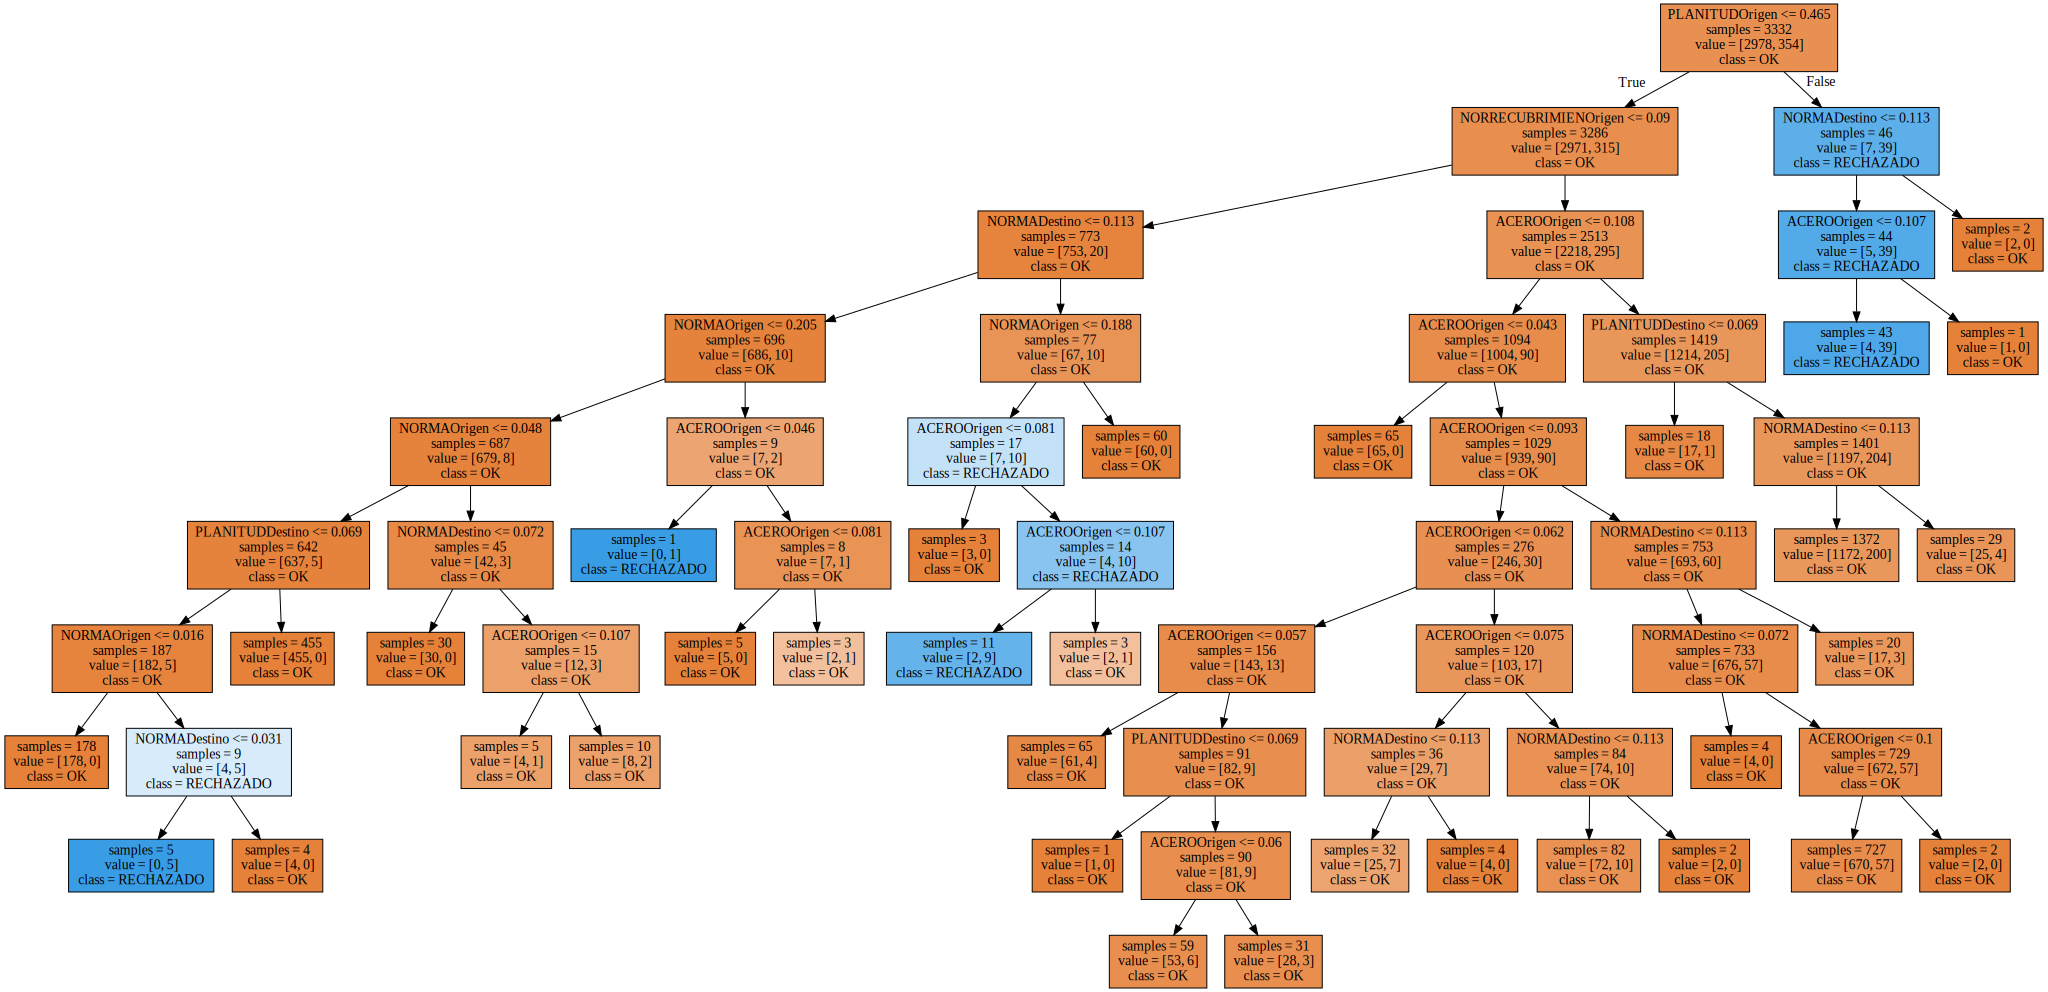

In [24]:
graphviz.Source(dot_data)

Text(0.5, 0, 'Importancia')

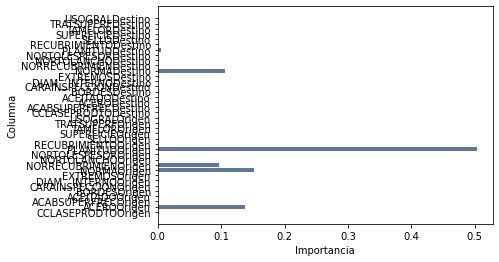

In [25]:
carac=main_df.shape[1]
plt.barh(range(carac),dt.feature_importances_)
plt.yticks(np.arange(carac),X.columns)
plt.ylabel('Columna')
plt.xlabel('Importancia')

In [26]:
# Separando los datos en sets de entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, 
                        target_df, random_state=1)

# Armando un simple arbol de decisión
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)
print('Precisión modelo inicial train/test  {0:.3f}/{1:.3f}'
      .format(tree.score(X_train, y_train), tree.score(X_test, y_test)))

Precisión modelo inicial train/test  0.909/0.905


In [27]:
# Utilizando AdaBoost para aumentar la precisión
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, 
                         learning_rate=1.5, random_state=1)
# Ajustando los datos
ada = ada.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [28]:
# Imprimir la precisión.
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('Precisión modelo con AdaBoost train/test  {0:.3f}/{1:.3f}'
      .format(ada_train, ada_test))

Precisión modelo con AdaBoost train/test  0.912/0.909


In [ ]:
# Armando el modelo con parametro max_depth
gbrt = GradientBoostingClassifier(random_state=0, n_estimators=500,
                                  max_depth=1, learning_rate=0.01)
# Ajustando el modelo
gbrt.fit(X_train, y_train)
print('Precisión Gradient Boosting train/test  {0:.3f}/{1:.3f}'
      .format(gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Precisión Gradient Boosting train/test  0.908/0.904
